In [141]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [142]:
train  = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [143]:
train[train['sentiment'] == 'positive'].head(10)

,textID,text,selected_text,sentiment
6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,fun,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive
11,16fab9f95b,I really really like the song Love Story by Taylor Swift,like,positive
21,e48b0b8a23,Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job. Can`t wait to have a dragon pet,interesting.,positive
25,e00c6ef376,"the free fillin` app on my ipod is fun, im addicted","the free fillin` app on my ipod is fun, im addicted",positive
28,6ce4a4954b,juss came backk from Berkeleyy ; omg its madd fun out there havent been out there in a minute . whassqoodd ?,fun,positive
30,d33f811375,I`m going home now. Have you seen my new twitter design? Quite....heavenly isn`****?,Quite....heavenly,positive
31,7d8c4c11e4,i hope unni will make the audition . fighting dahye unni !,hope,positive
33,2dc51711bc,That`s very funny. Cute kids.,funny.,positive
39,2863f435bd,"A little happy for the wine jeje ok it`sm my free time so who cares, jaja i love this day",A little happy fo,positive


In [144]:
train[train['sentiment'] == 'neutral'].head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
5,28b57f3990,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
10,2339a9b08b,"as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff","as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff",neutral
14,bbe3cbf620,test test from the LG enV2,test test from the LG enV2,neutral
19,40e7becabf,Hes just not that into you,Hes just not that into you,neutral
20,04d17ef61e,"oh Marly, I`m so sorry!! I hope you find her soon!! <3 <3","oh Marly, I`m so sorry!! I hope you find her soon!! <3 <3",neutral
22,7de057cf40,is cleaning the house for her family who is comming later today..,is cleaning the house for her family who is comming later today..,neutral
23,9ce5570064,gotta restart my computer .. I thought Win7 was supposed to put an end to the constant rebootiness,gotta restart my computer .. I thought Win7 was supposed to put an end to the constant rebootiness,neutral


In [145]:
train[train['sentiment'] == 'negative'].head(10)

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative
13,04dd1d2e34,i want to go to music tonight but i lost my voice.,lost,negative
15,8a939bfb59,"Uh oh, I am sunburned","Uh oh, I am sunburned",negative
16,3440297f8b,"S`ok, trying to plot alternatives as we speak *sigh*",*sigh*,negative
17,919fa93391,"i`ve been sick for the past few days and thus, my hair looks wierd. if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw",sick,negative
18,af3fed7fc3,is back home now gonna miss every one,onna,negative


In [146]:
train.loc[train['sentiment'] == 'negative', 'sentiment'] = -1
train.loc[train['sentiment'] == 'neutral', 'sentiment'] = 0
train.loc[train['sentiment'] == 'positive', 'sentiment'] = 1
test.loc[test['sentiment'] == 'negative', 'sentiment'] = -1
test.loc[test['sentiment'] == 'neutral', 'sentiment'] = 0
test.loc[test['sentiment'] == 'positive', 'sentiment'] = 1

In [147]:
test.head(10)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,1
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",-1
3,01082688c6,happy bday!,1
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1
5,726e501993,that`s great!! weee!! visitors!,1
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,-1
7,afa11da83f,"soooooo wish i could, but im in school and myspace is completely blocked",-1
8,e64208b4ef,and within a short time of the last clue all of them,0
9,37bcad24ca,What did you get? My day is alright.. haven`t done anything yet. leaving soon to my stepsister though!,0


In [148]:
train["text"]=train["text"].apply(str)
test["text"]=test["text"].apply(str)

In [149]:
train.drop(train.columns[[0,2]], axis = 1, inplace = True)
test.drop(test.columns[[0]], axis = 1, inplace = True)

In [150]:
#train=pd.concat([train,test])

In [151]:
train.shape

(27481, 2)

In [152]:
train.head(30000)

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on the releases we already bought",-1
...,...,...
27476,wish we could come see u on Denver husband lost his job and can`t afford it,-1
27477,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",-1
27478,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,1
27479,But it was worth it ****.,1


In [153]:
train["sentiment"].value_counts()

 0    11118
 1     8582
-1     7781
Name: sentiment, dtype: int64

In [154]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [155]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['text'], "@[\w]*") 
train.head()

,text,sentiment,tidy_tweet
0,"I`d have responded, if I were going",0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!,-1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...,-1,my boss is bullying me...
3,what interview! leave me alone,-1,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on the releases we already bought",-1,"Sons of ****, why couldn`t they put them on the releases we already bought"


In [156]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train.head(10)

,text,sentiment,tidy_tweet
0,"I`d have responded, if I were going",0,I d have responded if I were going
1,Sooo SAD I will miss you here in San Diego!!!,-1,Sooo SAD I will miss you here in San Diego
2,my boss is bullying me...,-1,my boss is bullying me
3,what interview! leave me alone,-1,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on the releases we already bought",-1,Sons of why couldn t they put them on the releases we already bought
5,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,0,http www dothebouncy com smf some shameless plugging for the best Rangers forum on earth
6,2am feedings for the baby are fun when he is all smiles and coos,1,am feedings for the baby are fun when he is all smiles and coos
7,Soooo high,0,Soooo high
8,Both of you,0,Both of you
9,Journey!? Wow... u just became cooler. hehe... (is that possible!?),1,Journey Wow u just became cooler hehe is that possible


In [157]:
tokenized_tweets = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
print(tokenized_tweets)

0                                                                                                           [I, d, have, responded, if, I, were, going]
1                                                                                                 [Sooo, SAD, I, will, miss, you, here, in, San, Diego]
2                                                                                                                          [my, boss, is, bullying, me]
3                                                                                                                   [what, interview, leave, me, alone]
4                                                                   [Sons, of, why, couldn, t, they, put, them, on, the, releases, we, already, bought]
                                                                              ...                                                                      
27476                                                     [wish, we, could, come, see, u

In [159]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

for tokenized_tweet in tokenized_tweets:
    for token in tokenized_tweet:
        if token in stop_words:
            tokenized_tweet.remove(token)

print(tokenized_tweets)            

0                                                                                 [I, responded, I, going]
1                                                                         [Sooo, SAD, I, miss, San, Diego]
2                                                                                         [boss, bullying]
3                                                                                [interview, leave, alone]
4                                                                [Sons, t, put, releases, already, bought]
                                                       ...                                                
27476                                      [wish, could, come, see, u, Denver, husband, lost, job, afford]
27477    [I, wondered, rake, The, client, made, clear, NET, force, devs, learn, new, lang, #agile, #ccnet]
27478                    [Yay, good, Enjoy, break, probably, need, hectic, weekend, Take, care, hun, xxxx]
27479                                

In [160]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [161]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(map(str,tokenized_tweets[i]))
    
train['tidy_tweet'] = tokenized_tweets

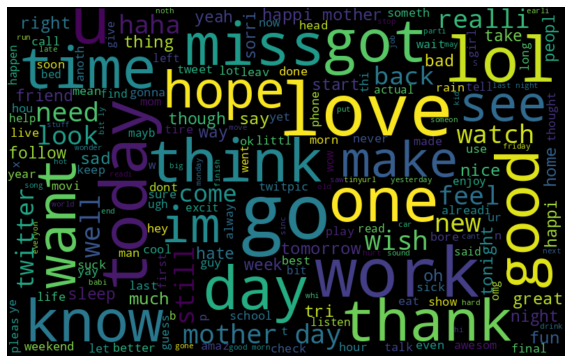

In [162]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

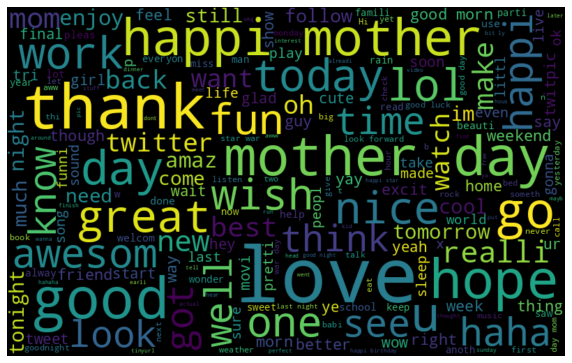

In [163]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()         #positive words

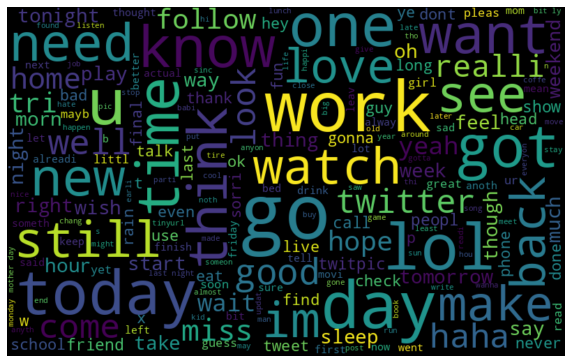

In [164]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()   #neutral words

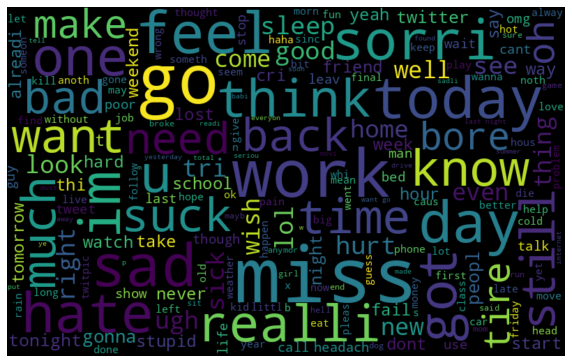

In [165]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()     #negative words

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [25]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])
bow.shape

(27481, 1000)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(27481, 1000)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
train_bow = bow[:27481,:]
test_bow = bow[27481:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [70]:
ytrain=ytrain.astype('int')
yvalid=yvalid.astype('int')

In [56]:
train_tfidf = tfidf[:27481,:]
test_tfidf = tfidf[27481:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [82]:
lreg = LogisticRegression(multi_class='ovr', solver='liblinear')
lreg.fit(xtrain_bow, ytrain) # training the model

predicted=lreg.predict(xvalid_bow)
#prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 0.3 than 1 else 0  
#prediction_int = prediction[:,-1] <= -0.3
#prediction_int = prediction_int.astype(np.int)

#print(f1_score(yvalid, prediction_int)) # calculating f1 score
#print(accuracy_score(yvalid,predicted))
#print(metrics.confusion_matrix(yvalid,predicted))
lreg.score(xvalid_bow,yvalid)

0.6963007883565797

In [80]:
lreg.fit(xtrain_tfidf, ytrain)

predicted=lreg.predict(xvalid_tfidf)

#prediction = lreg.predict_proba(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction[:,-1] <= -0.3
#prediction_int = prediction_int.astype(np.int)

#print(f1_score(yvalid, prediction_int))
#print(accuracy_score(yvalid,predicted))
lreg.score(xvalid_tfidf,yvalid)

0.6966646452395391

In [78]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

predicted=svc.predict(xvalid_bow)

#prediction = svc.predict_proba(xvalid_bow)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)
#print(f1_score(yvalid, prediction_int))
#print(accuracy_score(yvalid,predicted))
svc.score(xvalid_bow,yvalid)

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

#predicted=svc.predict(xvalid_tfidf)

#prediction = svc.predict_proba(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)
svc.score(xvalid_tfidf,yvalid)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

#predicted=rf.predict(xvalid_bow)

#prediction = rf.predict(xvalid_bow)
#print(f1_score(yvalid, prediction))
#print(accuracy_score(yvalid,predicted))
rf.score(xvalid_bow,yvalid)

0.6874469375379018

In [86]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

#predicted=rf.predict(xvalid_tfidf)

#prediction = rf.predict(xvalid_tfidf)
#print(f1_score(yvalid, prediction))
#print(accuracy_score(yvalid,predicted))
rf.score(xvalid_tfidf,yvalid)

0.6978775015160703